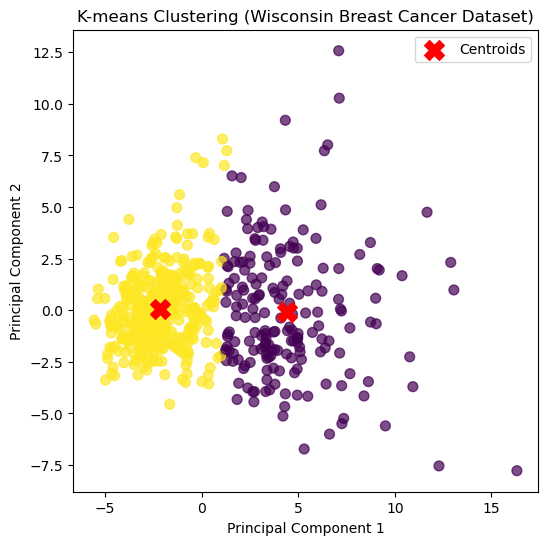

Clustering Accuracy: 91.21%
Confusion Matrix:
[[175  37]
 [ 13 344]]


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# ---- Load Wisconsin Breast Cancer Dataset ----
# Load the dataset from sklearn
data = load_breast_cancer()
X = data.data  # Features
print(X)
y = data.target  # Labels (0: malignant, 1: benign)

# ---- Preprocessing ----
# Standardizing the features to have mean=0 and variance=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---- Apply K-means Clustering ----
# Applying K-means with 2 clusters (since breast cancer can be malignant or benign)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Get the cluster labels assigned by K-means
y_kmeans = kmeans.predict(X_scaled)

# ---- Visualize the Clustering Result ----
# We will use the first two principal components for visualization (2D plot)
from sklearn.decomposition import PCA

# Reduce the dimensions to 2 for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(6, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', s=50, alpha=0.7)

# Mark the centroids of the clusters
centers = kmeans.cluster_centers_
centers_pca = pca.transform(centers)

plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, marker='X', label='Centroids')

# Add title and labels
plt.title("K-means Clustering (Wisconsin Breast Cancer Dataset)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

# ---- Evaluate the clustering result ----
# We can compare the clustering labels with the actual labels to see how well it performs
from sklearn.metrics import confusion_matrix, accuracy_score

# Accuracy based on comparison with actual labels
accuracy = accuracy_score(y, y_kmeans)
print(f"Clustering Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y, y_kmeans)
print(f"Confusion Matrix:\n{cm}")